In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('../data/train.csv')
#print(diabetes_data['가격'].value_counts())
data.head(3)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81


In [12]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


전처리 _ 결측치 확인

In [3]:
# Nan 확인
data.isna().sum()

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

In [4]:
# KOR -> ENG
def columns_toENG(Data):
    
    Data = Data.rename(columns={'생산년도':'Year_prd','모델출시년도':'Year_model','브랜드':'Brand','차량모델명':'Model','판매도시':'City','판매구역':'Area'})
    Data = Data.rename(columns={'주행거리':'Mileage','배기량':'CC','압축천연가스(CNG)':'Fuel_CNG','경유':'Fuel_Diesel','가솔린':'Fuel_Gasoline','하이브리드':'Fuel_Hybrid','액화석유가스(LPG)':'Fuel_LPG','가격':'Price'})

    return Data

df = columns_toENG(data)
df

,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


전처리 _ 중고차 분리

In [5]:
# 주행거리가 200km 미만인 데이터 갯수 : 1221개
len(df[df['Mileage']<200])

1221

In [6]:
# Criteria : 중고차 최소 km 기준

def drop_newCar(Data,Criteria):

    print("Before Datasets size : ", len(Data))
    newCar_idx = Data[Data['Mileage']<Criteria].index
    Data = Data.drop(index = newCar_idx)
    print("Delete Datasets size : ",len(newCar_idx))
    print("After Datasets size : ", len(Data))

    return Data

df = drop_newCar(df,200)
df

Before Datasets size :  57920
Delete Datasets size :  1221
After Datasets size :  56699


,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


전처리 _ 문자 -> 숫자 (Brand, Model, City, Area)

In [7]:
#xData_ = pd.get_dummies(xData)

# xData['Brand'] = xData['Brand'].astype('category')
# pd.get_dummies(xData['Brand'])

# Label Encoder
from sklearn.preprocessing import LabelEncoder

label_col = ['Brand','Model','City','Area']

for i in label_col:
    item_label = df[i]
    #print(item_label)
    encoder = LabelEncoder()
    encoder.fit(item_label)
    df[i] = encoder.transform(item_label)

# One-Hot Encoder
# from sklearn.preprocessing import OneHotEncoder

# label_col = ['Brand','Model','City','Area']

# for i in label_col:
#     items = xData[i]

#     oh_encoder=OneHotEncoder()
#     oh_encoder.fit(items)
#     oh_encoder.categories_
#     oh_labels = oh_encoder.transform(items)
#     arrayData = oh_labels.toarray()
#     xData[i] = arrayData

df

,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,16,47,1214,12,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,17,20,2137,13,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,9,36,785,15,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,11,133,546,15,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,3,25,1839,5,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,9,23,1957,15,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,12,142,2941,16,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,3,90,287,6,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,12,19,3174,0,189321,1598,0,0,1,0,0,16.77


전처리 _ 상관계수

In [8]:
# 숫자 항 만 상관계수 작성
def myCorr(data):

    corrList=[]
    tmp = data.dtypes
    findtype = ['int32','int64','float32', 'float64']
    for index,val in zip(tmp.index, tmp.values):
        if val in findtype:
            corrList.append(index)

    corrData = data[corrList].corr()

    print(corrData)
    
    # 시각화
    import seaborn as sns

    corrData.to_csv('corr.csv')

    figure = plt.figure(figsize=(15,15),facecolor='white')
    sns.heatmap(corrData, annot=True, cmap='Blues')

    #그림 파일 세이브
    figure.savefig('corr00.png')


               Year_prd  Year_model     Brand     Model      City      Area  \
Year_prd       1.000000    0.895093  0.157859  0.043807  0.008695  0.004444   
Year_model     0.895093    1.000000  0.137081  0.030639  0.009824  0.002979   
Brand          0.157859    0.137081  1.000000  0.180736 -0.004040  0.000262   
Model          0.043807    0.030639  0.180736  1.000000  0.000708 -0.003025   
City           0.008695    0.009824 -0.004040  0.000708  1.000000 -0.057449   
Area           0.004444    0.002979  0.000262 -0.003025 -0.057449  1.000000   
Mileage       -0.601371   -0.546150 -0.161536  0.004960 -0.008370 -0.011161   
CC            -0.287766   -0.263271 -0.273218  0.096610  0.013384 -0.013686   
Fuel_CNG       0.000937   -0.000615  0.004864  0.013079  0.003794  0.003988   
Fuel_Diesel    0.096490    0.082729 -0.074637  0.080422  0.002451  0.016376   
Fuel_Gasoline -0.064584   -0.054241  0.060265 -0.074947 -0.002378 -0.003011   
Fuel_Hybrid    0.099545    0.102038  0.087918 -0.008

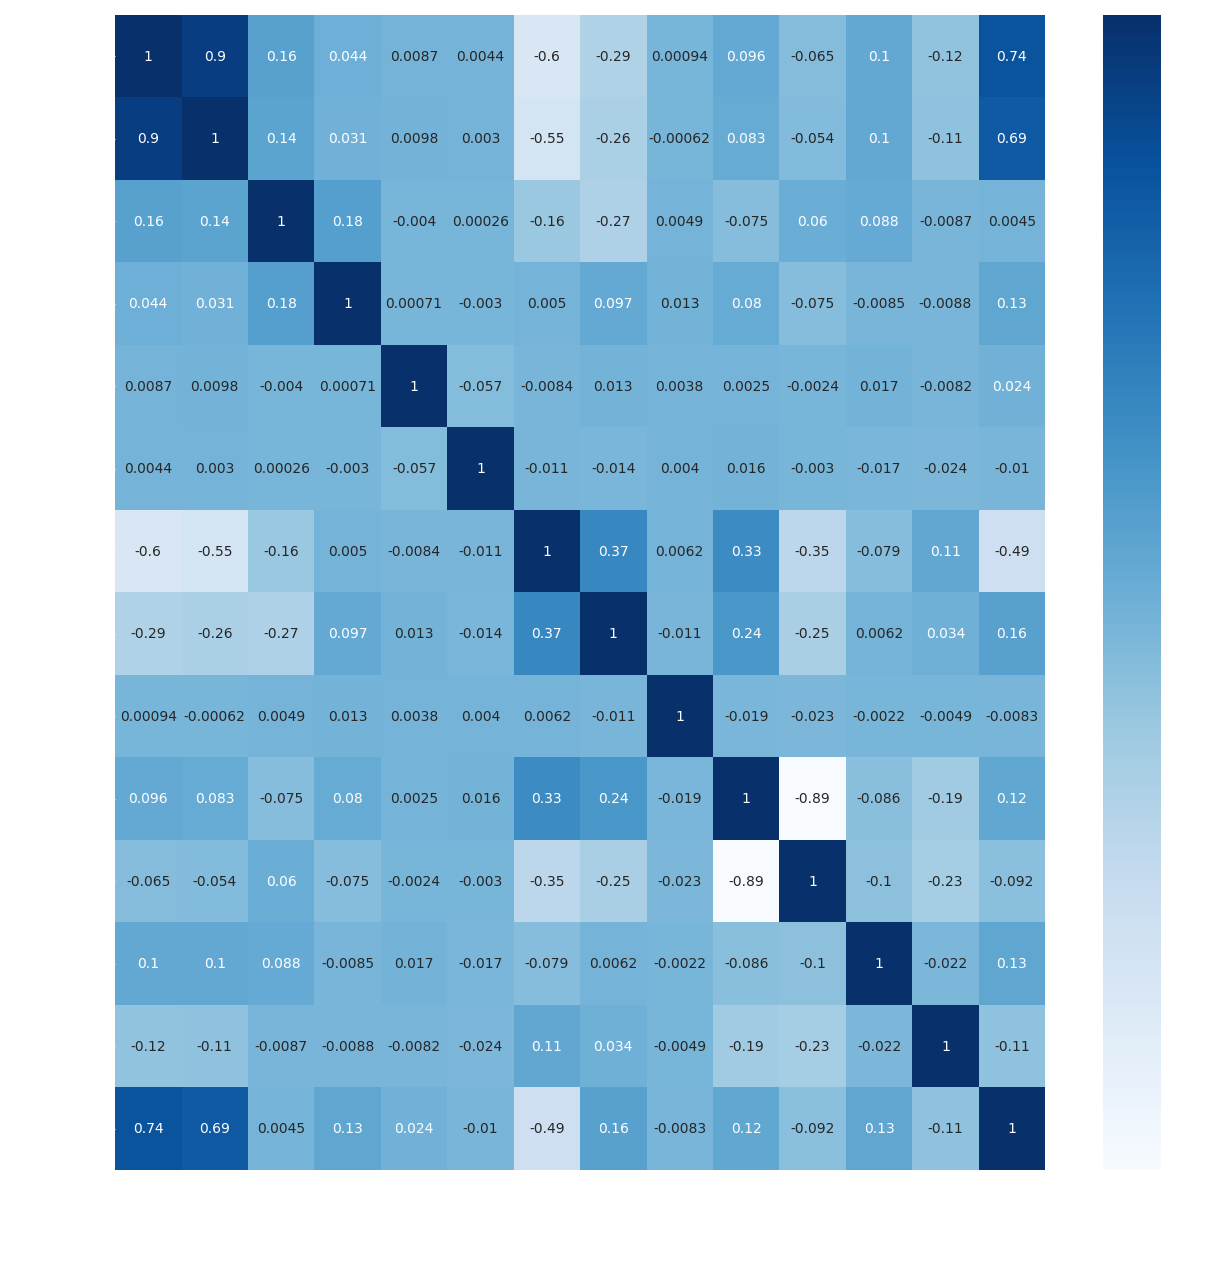

In [9]:
myCorr(df)

전처리 _ 산점도

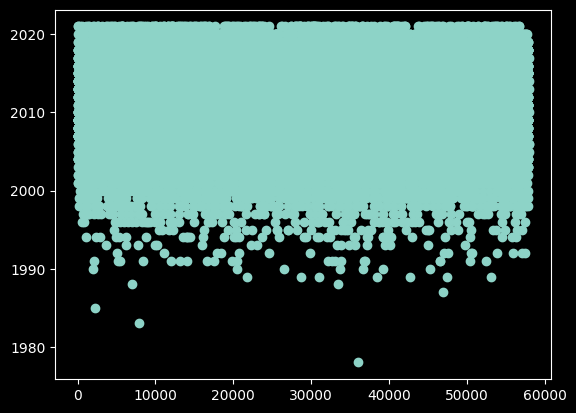

In [33]:
plt.scatter(df.index, df)

['ID', 'Year_prd', 'Year_model', 'Brand', 'Model', 'City', 'Area', 'Mileage', 'CC', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline', 'Fuel_Hybrid', 'Fuel_LPG', 'Price']


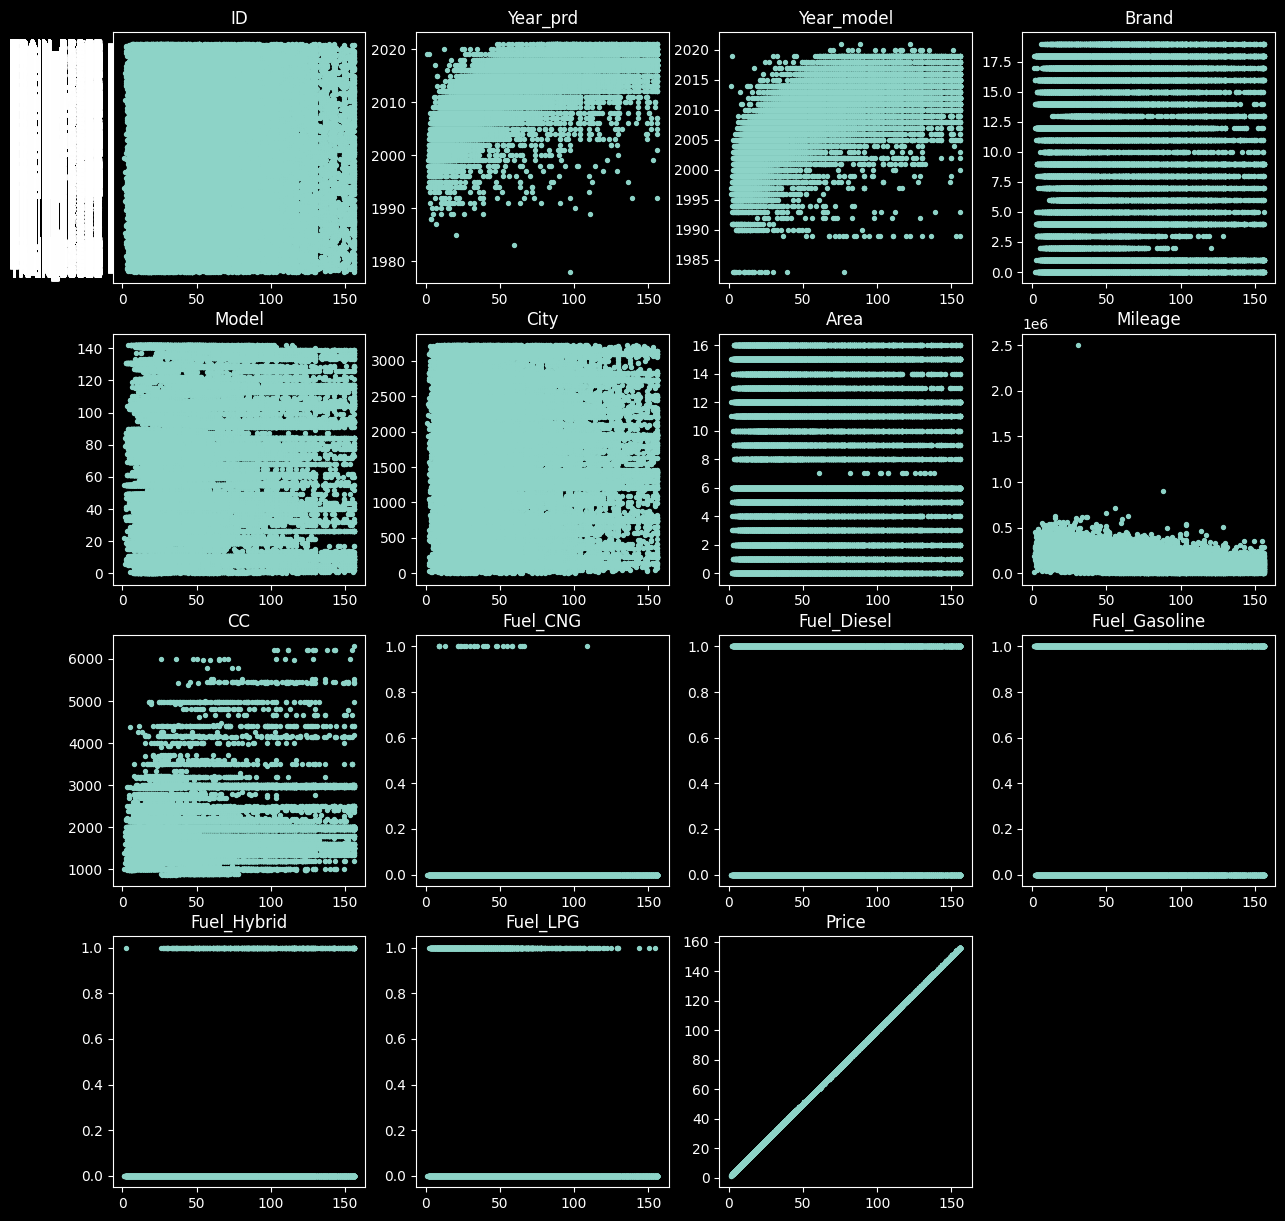

In [10]:
tmp = df.dtypes
valList=[]
findType=['int32','int64','float32','float64']
for index, val in zip(tmp.index, tmp.values):
    #if index in findType:
    valList.append(index)

print(valList)
#lenL = len(valList)

figure = plt.figure(figsize=(15,15))
for cnt, val in enumerate(valList):
    plt.subplot(4, 4, cnt+1)
    plt.scatter(df['Price'], df[val],s=8)
    plt.title(val)

#그림 파일 세이브
figure.savefig('scatter00.png')

전처리 _ X,Y 데이터셋 분할

In [32]:
def split_X_Y(data):

    xData= data.drop(columns=['Price'])
    yData= data['Price']

    return xData , yData

xData , yData = split_X_Y(df)

# ID 열 제외
xData = xData.drop(columns = ['ID'])

# 상관계수 낮은 애들 제외
dropList=['City','Area']
for x in dropList:
    xData = xData.drop(columns=[x])

print(xData[:5])
print('-------------------------------------')
print(yData[:5])



   Year_prd  Year_model  Brand  Model  Mileage    CC  Fuel_CNG  Fuel_Diesel  \
0      2018        2014     16     47    85231   999         0            0   
1      2010        2006     17     20   135000  1598         0            0   
2      2002        2002      9     36   255223  1796         0            0   
3      2006        2001     11    133   238000  2184         0            1   
4      2007        2007      3     25   251000  1910         0            1   

   Fuel_Gasoline  Fuel_Hybrid  Fuel_LPG  
0              1            0         0  
1              1            0         0  
2              1            0         0  
3              0            0         0  
4              0            0         0  
-------------------------------------
0    51.74
1    41.47
2    17.81
3    18.20
4    17.55
Name: Price, dtype: float64


In [64]:
# train / text 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=0.2, random_state=11)

Lasso

In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [57]:
# Lasso 적합

ll = Lasso(alpha = 1 ) # alpha = Lambda
result = ll.fit(X_train,y_train)

In [58]:
# 회귀계수 출력
ll.coef_

array([ 4.18173223e+00,  1.02008631e+00, -1.77643710e-01,  5.10760398e-02,
       -8.73751760e-05,  2.74530311e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [37]:
print("훈련 세트의 정확도 : {:.2f}".format(ll.score(X_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(ll.score(X_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(ll.coef_ != 0)))

print("사용한 max_iter : {}".format(ll.n_iter_))

훈련 세트의 정확도 : 0.73
테스트 세트의 정확도 : 0.73
사용한 특성의 수 : 9
사용한 max_iter : 74


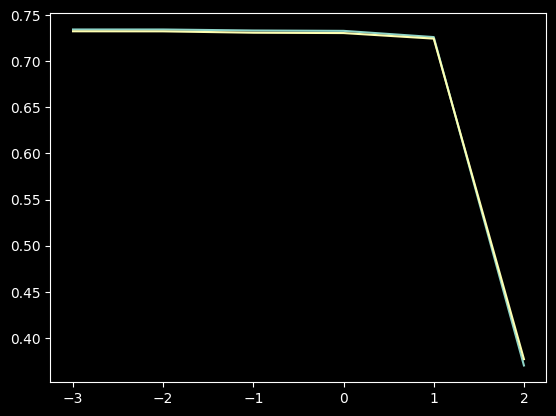

In [39]:
# 라쏘 회귀 alpha 비교 => 1
train_score, test_score = [], []

a_list=[0.001,0.01,0.1,1,10,100]

for a in a_list:
    lls = Lasso(alpha=a, max_iter=10000)
    lls.fit(X_train, y_train)
    train_score.append(lls.score(X_train,y_train))
    test_score.append(lls.score(X_test,y_test))

plt.plot(np.log10(a_list),train_score)
plt.plot(np.log10(a_list),test_score)

plt.show()

In [51]:
X_train.iloc[:,ll.coef_!=0].columns

Index(['Year_prd', 'Year_model', 'Brand', 'Model', 'Mileage', 'CC'], dtype='object')

예측

In [59]:
lasso_y_hat = ll.predict(X_test)


In [60]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

lasso_r2 = r2_score(y_test,lasso_y_hat)
lasso_MSE = mean_squared_error(y_test,lasso_y_hat)
lasso_MAE = mean_absolute_error(y_test,lasso_y_hat)

print('R2 score: %.2f, MSE: %.2f, MAE: %.2f' %(lasso_r2, lasso_MSE, lasso_MAE))

R2 score: 0.73, MSE: 327.20, MAE: 13.44


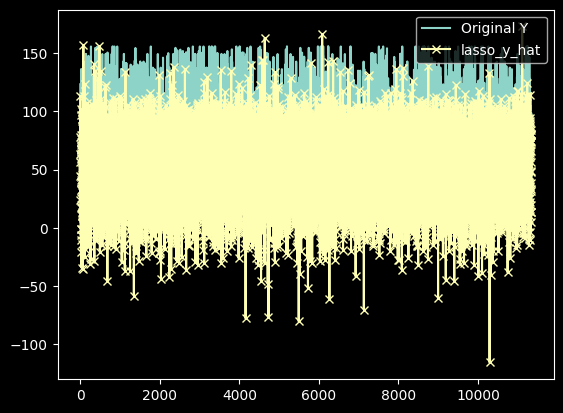

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), lasso_y_hat, '-x', label="lasso_y_hat")

plt.legend(loc='upper right')
plt.show()

오차행렬 -> 이진 일 때에만.

In [62]:
print(y_test, lasso_y_hat)

30117    123.37
22953     44.20
15494     96.20
32986     10.79
31144     51.94
          ...  
42700     99.45
33950     30.55
45744     12.87
10505     98.61
47259     20.15
Name: Price, Length: 11340, dtype: float64 [1 1 1 ... 1 1 1]


In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 0/1 cut-off(임계값) 함수

def cut_off(y, threshold):
	Y = y.copy()
	Y[Y>threshold] = 1
	Y[Y<=threshold] = 0
	return (Y.astype(int))

# 정확도 acc 함수 

def acc(cfmat):
	acc = (cfmat[0,0] + cfmat[1,1]) / np.sum(cfmat)
	return acc

lasso_y_hat = cut_off(lasso_y_hat, 0.5)
cfmat = confusion_matrix(y_test,lasso_y_hat)
print(acc(cfmat))

ValueError: Classification metrics can't handle a mix of continuous and binary targets